In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys
import time
import tqdm
import sklearn
from sklearn import datasets
from sklearn import svm

# Linear Regression


*   Dataset: house price from boston
*   Objective: implement both numerical + analytical solutions
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


1.   Analytical solution: $\beta = (X^TX)^{-1}X^T y$
2.   Numerical solution:

      *   Loss function (MSE): $\mathcal{L} (y, \hat{y}) = \frac{1}{N}\sum_{i=1}^N (y-\hat{y})^2$
      *   Update rule: $\beta_{t+1} = \beta_t - \gamma \nabla \mathcal{L} (\beta_t)$
      *   Momentum: $\Delta \beta_{t+1} = -\gamma \nabla \mathcal{L}(\beta_{t+1}) + \alpha\Delta \beta_{t}$
      *   Update rule for momentum:  $\beta_{t+1} = \beta_t + \Delta \beta_{t}$


*  Visualize loss convergent
*  Plot linear regression line 
*  Comparison:
    -  Time 
    -  MSE
    -  Matching parameter vectors $\beta$









In [3]:
# LOAD DATA
X, y = datasets.load_boston(return_X_y=True)
X = np.append(np.ones((X.shape[0],1)),X,axis=1)

In [4]:
# Analytical solution
begin = time.time()
Xt= np.transpose(X)
beta = np.linalg.inv(np.matmul(Xt,X))
beta = np.matmul(beta,np.matmul(Xt,y))

print('Run time: ',time.time()-begin)

print(np.mean((y-np.matmul(X,beta))**2)) #MSE

Run time:  0.0004992485046386719
21.8948311817292


In [5]:
# IMPLEMENT GRADIENT DESCENT HERE
# REQUIREMENTS: a function to calculate the gradient , a function to calculate the loss function, a function to excecute gradient descent
class LinearRegression:
    loss = 0
    beta = np.ones(X.shape[1])
    loss_history = np.array([])
    iterator = np.array([])

    def cost_function(self, X, y):  #MSE
        return np.mean((y-np.matmul(X,self.beta))**2)

    def gradient(self, X, y): #L2(X*beta-y)^2
        yy = np.matmul(X,self.beta)-y
        return 2*np.matmul(X.T,yy)

    def fit(self, X, y, tau = 0.001, gamma = 0.000000001):    
        loss = 0
        cost_dif = 100000000000000
        cnt = 0
                 
        while cost_dif >= tau:
            # Gradient Descent
            self.beta -= gamma*self.gradient(X,y)
            loss = self.cost_function(X,y)
            cost_dif = abs(self.loss - loss)
            self.loss = loss
                
            # Saving Progress
            if cnt>=100:
                self.loss_history = np.append(self.loss_history,loss)
                self.iterator = np.append(self.iterator,cnt)
            cnt += 1
    
    def predict(self, X):        
        return np.matmul(X,self.beta)

    def fit_momentum(self, X, y, tau = 0.000001, gamma = 0.000000001, alpha = 0.9):
        loss = 0
        gradient = np.zeros(X.shape[1])
        cost_dif = 1000000000
        while cost_dif >= tau:
            # Gradient Descent with momentum
            gradient = -gamma*self.gradient(X,y) + alpha*gradient
            self.beta = self.beta + gradient
            loss = self.cost_function(X,y)
            cost_dif = abs(self.loss - loss)
            self.loss = loss
                
            # Saving Progress

begin = time.time()
model = LinearRegression()
model.fit(X,y)
#y_predict = model.predict(X)
#print(y,y_predict)
print('Run time: ',time.time()-begin)
print(model.loss)

Run time:  2.6285951137542725
60.260731151124595


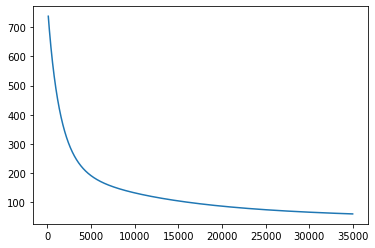

In [6]:
# VISUALIZATION
plt.plot(model.iterator,model.loss_history)

In [7]:
# SOLUTION FROM SKLEARN
sk_model = sklearn.linear_model.LinearRegression()
sk_model.fit(X, y)
response = sk_model.predict(X)

print(np.mean((y-response)**2))

21.894831181729202


# Logistic Regression

*   Dataset: breast cancer dataset
*   Objective: implement both numerical solution
*   PLot and check for convergence
*   Compare with Linear Regression using sklearn


##   Numerical solution:

*   Loss function (Maximum Likelihood Estimator): $\mathcal{L} (y,\hat{y}) = -\frac{1}{N}\sum_{i=1}^N \left[y_i\cdot\log(\hat{y}_i)+(1-y_i)\log(1-\hat{y}_i)\right]$

*   Logistic function : $\sigma(t) = \frac{1}{1+e^{-t}}$
      

In [8]:
X,y = datasets.load_breast_cancer(return_X_y = True)

In [9]:
class LogisticRegression:

    beta = np.zeros(X.shape[1])
    cost = 0

    def logistic_function(self, t):
        return 1/(1+np.exp(-t))

    def prob(self, X):
        return self.logistic_function(np.dot(self.beta, X.T))

    def cost_function(self, X, y): 
        return -np.mean(y*np.log(self.prob(X))+(1-y)*np.log(1-self.prob(X)))

    def grad_function(self, X, y):
        N = X.shape[0]
        return np.dot(X.T, self.logistic_function(np.dot(self.beta, X.T)) - y)/N

    def fit(self, X, y, tau=0.000001, lr=0.00005):
        cost = 0
        cost_dif=1000000000
                 
        while cost_dif >= tau:        
            # Gradient Descent
            self.beta -= lr*self.grad_function(X,y)
            cost = self.cost_function(X,y)
            cost_dif = abs(self.cost - cost)
            self.cost = cost
            # Saving Progress
    
    def predict(self, X):        
        return self.prob(X)

    def accuracy(self, x, actual_classes, probab_threshold=0.5):
        predicted_classes = (self.predict(X) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        accuracy = np.mean(predicted_classes == actual_classes)
        return accuracy


model = LogisticRegression()
model.fit(X,y)
#y_predict = model.predict(X)
#print(y,y_predict)
print(model.accuracy(X,y))

<ipython-input-9-3296a314cb33>:13: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y*np.log(self.prob(X))+(1-y)*np.log(1-self.prob(X)))


0.9209138840070299


In [10]:
skmodel = sklearn.linear_model.LogisticRegression(max_iter=10000)
skmodel.fit(X,y)
print(skmodel.score(X,y))

0.9578207381370826


# Support Vector Machine


*   Dataset: breast cancer
*   Objective: understand how SVM work/ the effects of choosing kernels on dataset



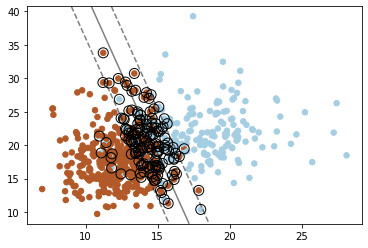

In [10]:
X, y = datasets.load_breast_cancer(return_X_y = True)
X = X[:,:2]

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()